# Machine Learning with Tensorflow
> This code snippet features an implementation of a regression model using neural networks, specifically utilizing the Tensorflow library. The data set can be found on kaggle at: https://www.kaggle.com/datasets/mirichoi0218/insurance

The dataset contains the following features:
- <b>age</b>: age of primary beneficiary

- <b>sex</b>: insurance contractor gender, female, male

- <b>bmi</b>: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

- <b>children</b>: Number of children covered by health insurance / Number of dependents

- <b>smoker</b>: Smoking

- <b>region</b>: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

- <b>charges</b>: Individual medical costs billed by health insurance

The model is designed to predict insurance (charges) values of based on certain features as stated above.

## Exploratory Analysis
> In this section, I begin by loading the data and conducting an exploratory analysis to identify potential relationships between the different features. Additionally, I create visualizations to gain a better understanding of the data and its patterns.

In [1]:
#import the needed libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read file from path to dataframe
file = 'archive_insurance/insurance.csv'
df = pd.read_csv(file)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.shape

(1338, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


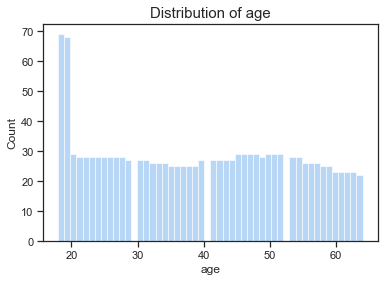

In [6]:
sns.set_theme(palette = 'pastel', style = 'ticks')
plt.title('Distribution of age', fontsize = 15)
sns.histplot(df['age'], bins = 50);

The highest age count is 18 years followed by 19 years. Other years show an almost even frequency across the dataset.

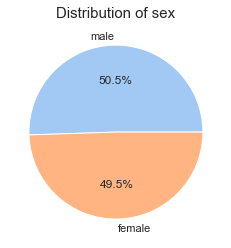

In [7]:
#Distribution of sex
plt.title('Distribution of sex', fontsize = 15)
plt.pie(df['sex'].value_counts().values, labels =  df['sex'].value_counts().index, autopct='%1.1f%%');

There are more males than females with percentages of 50.5% and 49.5% respectively.

C:\Users\Mary\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


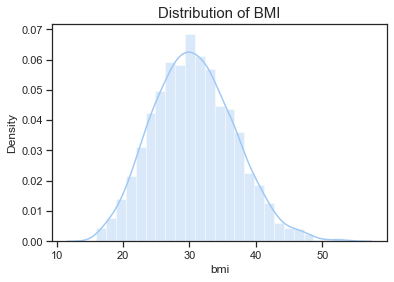

In [8]:
sns.distplot(df['bmi'])
plt.title('Distribution of BMI', fontsize = 15);

<AxesSubplot:xlabel='children', ylabel='Count'>

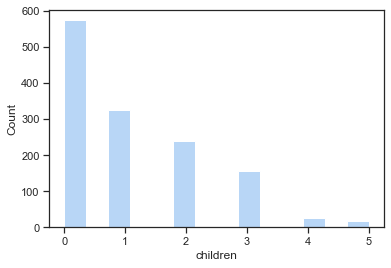

In [9]:
sns.histplot(data = df, x = 'children')

Most people don't have children from this dataset.

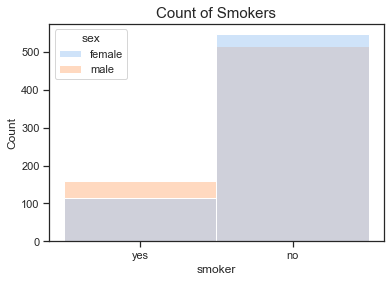

In [10]:
plt.title('Count of Smokers', fontsize = 15)
sns.histplot(data = df, x = 'smoker', hue = 'sex', bins = 70);

There are more non-smokers than smokers. Additionally, there are more male smokers than female smokers. 

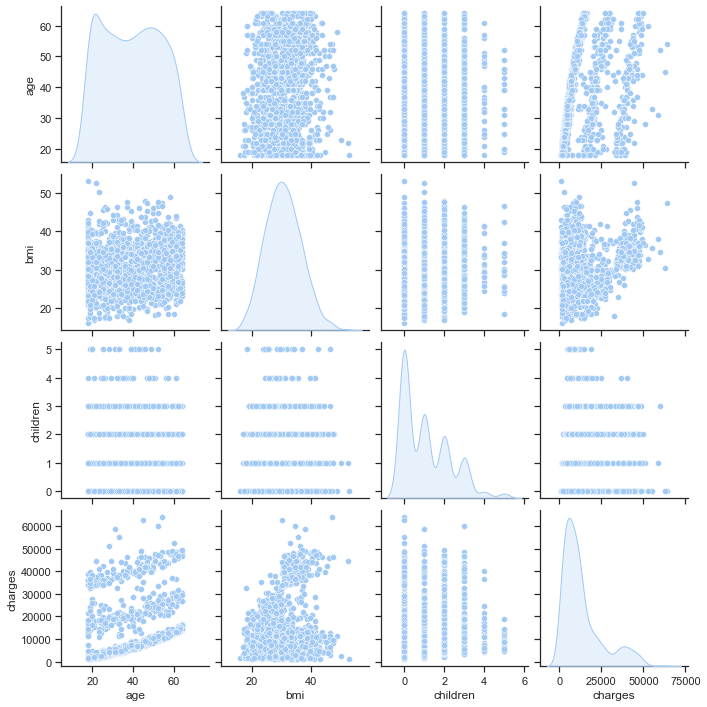

In [11]:
sns.pairplot(df[['age','bmi','children','charges']], diag_kind = 'kde')

## Preprocessing the features for the model
> In this step, I perform data preprocessing to handle the presence of both numerical and categorical features in the data. This involves transforming the data into the appropriate format that can be effectively used by the model. This includes techniques such as <b>encoding</b> categorical variables using the <b>OneHotEncoder</b> class from scikit learn, and other necessary data transformations to ensure that the data is ready for the model to process effectively. Properly preprocessing the data allows the model to effectively utilize both numerical and categorical features in its computations, leading to more accurate and reliable predictions.

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Viewing the categorical variables

In [14]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [15]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [16]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

### Separate categorical features

In [17]:
# Select categorical feeatures
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

In [18]:
from sklearn.preprocessing import OneHotEncoder

In [19]:
#create an object of the OneHotEncoder class
encoder = OneHotEncoder()

In [20]:
encoded_data = encoder.fit_transform(df[cat_cols]).toarray()

In [21]:
# Create a new dataframe of transformed features and concatenate with the main dataframe
encoded_df = pd.DataFrame(encoded_data, columns = encoder.get_feature_names_out(cat_cols))
final_df = pd.concat([df, encoded_df], axis = 1)

In [22]:
final_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'sex_female', 'sex_male', 'smoker_no', 'smoker_yes', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [23]:
final_df.head()

,age,sex,bmi,children,smoker,region,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


### Select the features and label for the model.

In [24]:
x = final_df.drop(['sex', 'smoker','region','charges'], axis = 1)
y = final_df['charges']

In [25]:
#split into train and test partitions
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = 0.2, random_state = 42)

## Create a Sequential Model
>In this section, I utilized the Sequential model from TensorFlow to construct a neural network for regression. The neural network consisted of three dense layers, which were designed to capture the complex relationships within the data and make predictions based on the regression task at hand.

In [26]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [27]:
#create an instance of the Sequenctial class
model = Sequential()

In [28]:
#adding layers to the network
model.add(Dense(8, activation = 'relu', input_shape = (x.shape[1],)))
model.add(Dense(16, activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation = 'linear')) # linear is used because the goal is to perform a regression task

In [29]:
# Summary of model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 96        
                                                                 
 dense_1 (Dense)             (None, 16)                144       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [31]:
history = model.fit(x_train, y_train, validation_split = 0.2, epochs = 50)

Epoch 1/50
27/27 [==============================] - 6s 56ms/step - loss: 326502464.0000 - val_loss: 311138560.0000
Epoch 2/50
27/27 [==============================] - 1s 28ms/step - loss: 326128608.0000 - val_loss: 310857824.0000
Epoch 3/50
27/27 [==============================] - 1s 25ms/step - loss: 325861984.0000 - val_loss: 310636352.0000
Epoch 4/50
27/27 [==============================] - 1s 31ms/step - loss: 325649536.0000 - val_loss: 310418528.0000
Epoch 5/50
27/27 [==============================] - 0s 13ms/step - loss: 325401568.0000 - val_loss: 310168256.0000
Epoch 6/50
27/27 [==============================] - 0s 8ms/step - loss: 325102048.0000 - val_loss: 309877888.0000
Epoch 7/50
27/27 [==============================] - 0s 6ms/step - loss: 324803392.0000 - val_loss: 309526496.0000
Epoch 8/50
27/27 [==============================] - 0s 8ms/step - loss: 324323200.0000 - val_loss: 309077760.0000
Epoch 9/50
27/27 [==============================] - 0s 6ms/step - loss: 323796192.0

### Function to plot loss 

In [32]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Error [charges]')
    plt.legend()
    plt.grid(True)

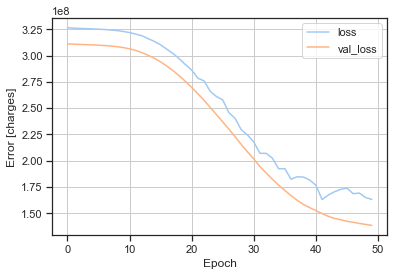

In [33]:
plot_loss(history)